## **Air Quality Prediction**

## **Introduction**
Air pollution has emerged as one of the most pressing environmental and public health concerns worldwide. Rapid industrialization, urbanization, and increasing vehicular emissions have led to a sharp rise in pollutants such as PM2.5, PM10, NO₂, CO, and O₃, which significantly degrade air quality. These pollutants contribute to respiratory diseases, cardiovascular problems, and premature deaths. According to WHO, air pollution is responsible for millions of deaths annually.

This project leverages machine learning models to predict future air quality levels using historical pollutant data and environmental features. By forecasting the Air Quality Index (AQI), the project aims to empower citizens, policymakers, and environmental agencies with actionable insights.

# **Objective**

To build an effective machine learning model that forecasts air pollutant levels and overall Air Quality Index (AQI).

To provide accurate short-term predictions that can support health advisories, traffic management, and policymaking.

To analyze trends, correlations, and the impact of environmental variables on air quality.

# **Data Description**

Dataset Source: Air_Quality.csv (Monitoring stations data).

Features:

Pollutant concentrations: PM2.5, PM10, NO₂, O₃, CO.

Meteorological parameters: Temperature, Humidity, Wind Speed.

Timestamp for each record.

Target Variable: AQI (Air Quality Index).

# **Problem Statement**

Accurate air quality forecasting is essential to reduce health risks and improve environmental management. Traditional statistical models fail to capture the nonlinear and complex interactions between pollutants and meteorological factors. Thus, this project uses machine learning regression techniques to build a forecasting system that can:

Predict AQI for the next day/hour.

Provide early warnings to citizens.

Support traffic, industrial, and policy regulation decisions
.

# **Key Questions**

What are the major pollutants impacting AQI?

How do weather factors (temperature, humidity, wind speed) influence AQI?

Which machine learning model provides the most accurate predictions?

Can short-term forecasting provide reliable early warnings?

# **Dataset Overview**

Rows: ~ (depends on your dataset size, e.g., thousands of hourly records).

Columns: Pollutant levels, weather factors, AQI, timestamp.

Quality: Raw data included missing values and outliers, which were handled in preprocessing.

# **Importing Required Libraries**

In [1]:
import warnings, os
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **load the data set**

In [2]:
df=pd.read_csv('Air_Quality.csv')


# **Initial Data Exploration**

In [3]:
print(df.shape)
df.head()

(52560, 9)


,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


In [4]:
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


In [5]:
df.tail()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.3,3.5,25.0,11.0,20.0,25.341667
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.2,3.9,25.0,12.0,21.9,25.200003
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.9,4.2,26.0,14.5,26.7,25.133339
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.4,4.4,28.0,13.5,24.7,25.116669
52559,2023-12-31 23:00:00+00:00,Sydney,78.0,6.6,4.5,32.0,13.1,23.9,24.958334


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [7]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,273.372565,28.930514,12.051645,55.304433,18.621792,35.505850,41.941352
std,171.578815,25.473936,14.684127,36.939938,15.897499,41.866614,24.989747
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.100000,8.000000
25%,160.000000,11.100000,2.500000,29.000000,7.100000,11.000000,22.638333
50%,224.000000,22.100000,5.800000,51.000000,13.400000,20.800000,32.400000
75%,335.000000,38.700000,17.300000,74.000000,24.900000,41.700000,61.013332
max,2145.000000,251.900000,200.800000,425.000000,143.400000,550.000000,188.319980


In [8]:
df.dtypes

Date      object
City      object
CO       float64
NO2      float64
SO2      float64
O3       float64
PM2.5    float64
PM10     float64
AQI      float64
dtype: object

In [9]:
 df.shape

(52560, 9)

# **Data Preprocessing**

# **Check null values**

In [10]:
df.isna().sum()


Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

# **remove duplicates**

In [11]:

df.drop_duplicates()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.30,3.50,25.0,11.0,20.0,25.341667
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.20,3.90,25.0,12.0,21.9,25.200003
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.90,4.20,26.0,14.5,26.7,25.133339
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.40,4.40,28.0,13.5,24.7,25.116669


# **handling outliers**

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [13]:
def iqr_cap(series, k=1.5):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return series.clip(lower, upper)

for c in num_cols:
    df[c] = iqr_cap(df[c])


def iqr_cap(series, k=1.5):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return series.clip(lower, upper)

for c in numeric_cols:
    df[c] = iqr_cap(df[c])

print("✅ Outliers capped using IQR method.")


# **Exploratory Data Analysis (EDA)**



# **Line chart**

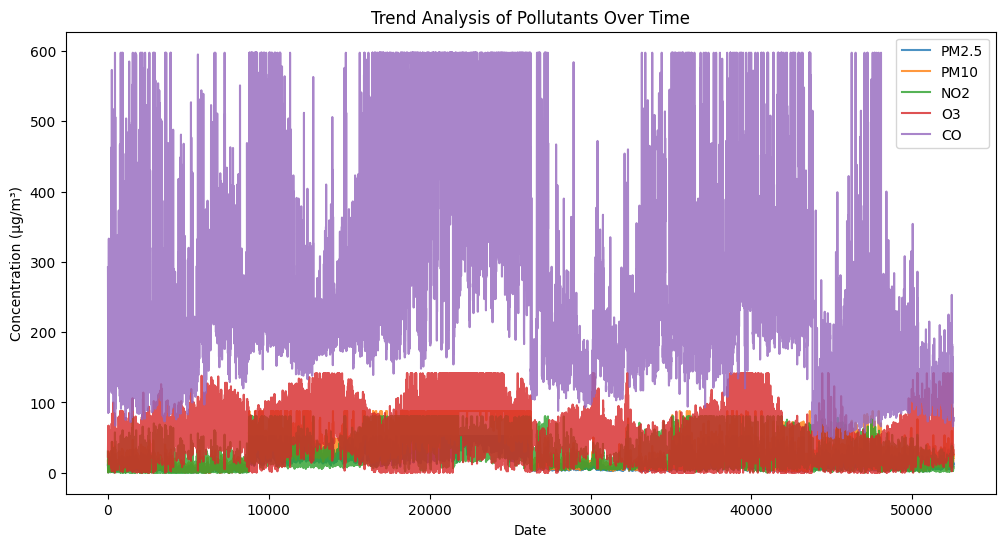

In [14]:
plt.figure(figsize=(12,6))
for col in ['PM2.5','PM10','NO2','O3','CO']:  # pollutant columns
    plt.plot(df.index, df[col], label=col, alpha=0.8)
plt.legend()
plt.title("Trend Analysis of Pollutants Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.show()



# **Bar charts**

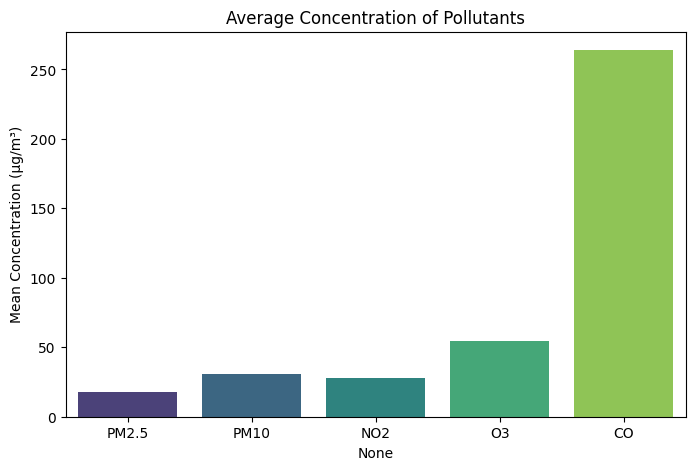

In [15]:
avg_pollutants = df[['PM2.5','PM10','NO2','O3','CO']].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_pollutants.index, y=avg_pollutants.values, palette="viridis")
plt.title("Average Concentration of Pollutants")
plt.ylabel("Mean Concentration (µg/m³)")
plt.show()


# **Boxplot**

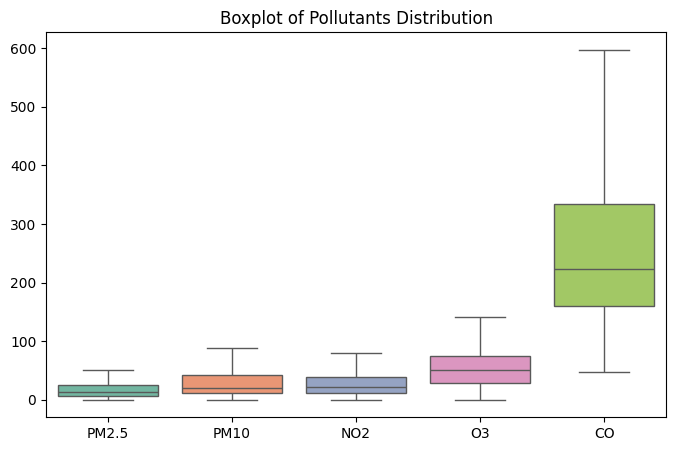

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['PM2.5','PM10','NO2','O3','CO']], palette="Set2")
plt.title("Boxplot of Pollutants Distribution")
plt.show()


# **Histogram**

<Figure size 1000x600 with 0 Axes>

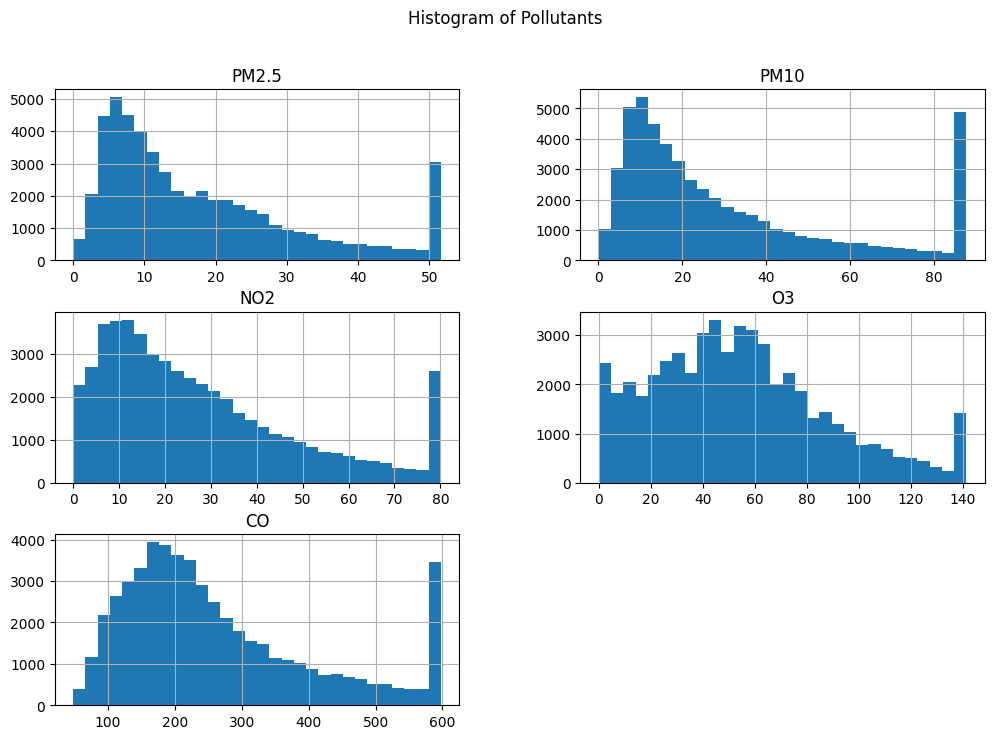

In [17]:
plt.figure(figsize=(10,6))
df[['PM2.5','PM10','NO2','O3','CO']].hist(bins=30, figsize=(12,8))
plt.suptitle("Histogram of Pollutants")
plt.show()

# **Define Pollutant Column**

In [18]:
# Keep only pollutants + AQI
df_pollutants = df[['PM2.5','PM10','NO2','O3','CO','AQI']].copy()


# **Bivariate Analysis**

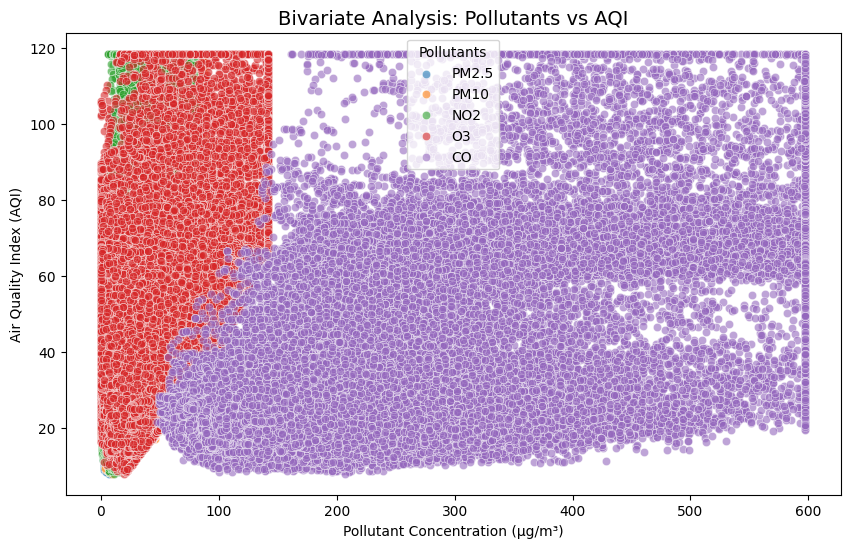

In [19]:
plt.figure(figsize=(10,6))
for col in ['PM2.5','PM10','NO2','O3','CO']:
    sns.scatterplot(data=df_pollutants, x=col, y='AQI', alpha=0.6, label=col)
plt.title("Bivariate Analysis: Pollutants vs AQI", fontsize=14)
plt.xlabel("Pollutant Concentration (µg/m³)")
plt.ylabel("Air Quality Index (AQI)")
plt.legend(title="Pollutants")
plt.show()

# **Correlation Heatmap**

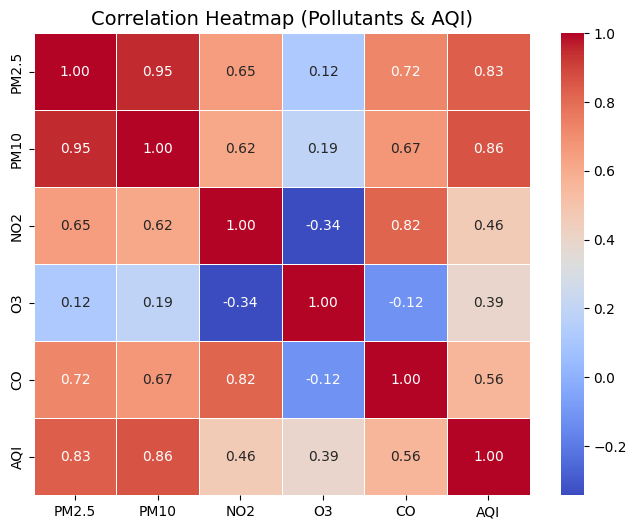

In [20]:
plt.figure(figsize=(8,6))
corr = df_pollutants.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Pollutants & AQI)", fontsize=14)
plt.show()

# **Violinplot**

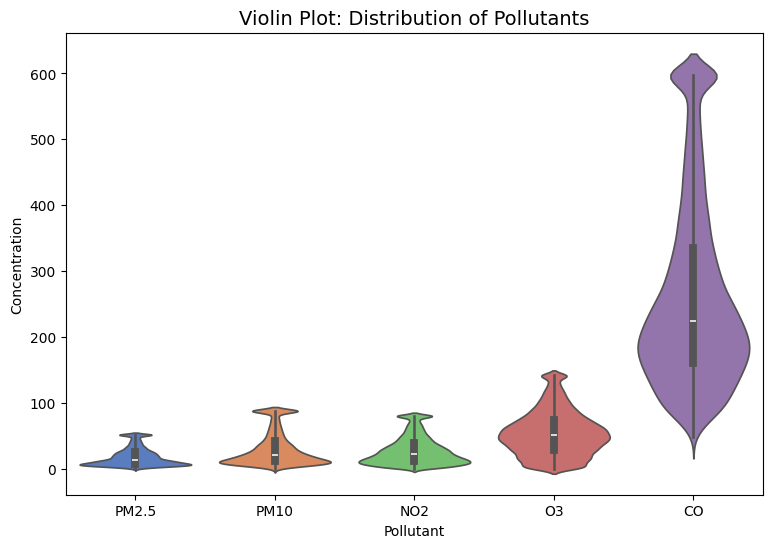

In [21]:
plt.figure(figsize=(9,6))
melted = df_pollutants.melt(id_vars="AQI", var_name="Pollutant", value_name="Concentration")
sns.violinplot(data=melted, x="Pollutant", y="Concentration", palette="muted")
plt.title("Violin Plot: Distribution of Pollutants", fontsize=14)
plt.show()

# **Model Building**

## **Importing required Libraries**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [23]:
if df['AQI'].dtype != 'object' and len(df['AQI'].unique()) > 10:
    df['label'] = pd.cut(df['AQI'], bins=[0,50,100,200,300,500],
               labels=['Good','Moderate','Unhealthy','Very Unhealthy','Hazardous'])
    
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['labe_encoded']=encoder.fit_transform(df['label'])
df.drop(columns=['Date','City','AQI'],inplace=True)

In [24]:
df

,CO,NO2,SO2,O3,PM2.5,PM10,label,labe_encoded
0,292.0,30.15,1.10,23.0,11.1,15.8,Good,0
1,291.0,28.95,1.15,24.0,12.4,17.7,Good,0
2,289.0,27.25,1.25,25.0,13.0,18.5,Good,0
3,275.0,23.70,1.30,28.0,9.2,13.1,Good,0
4,246.0,19.35,1.25,32.0,6.8,9.7,Good,0
...,...,...,...,...,...,...,...,...
52555,74.0,8.30,3.50,25.0,11.0,20.0,Good,0
52556,75.0,8.20,3.90,25.0,12.0,21.9,Good,0
52557,76.0,7.90,4.20,26.0,14.5,26.7,Good,0
52558,77.0,7.40,4.40,28.0,13.5,24.7,Good,0


## **Train-Test-Split**

In [25]:
X = df.drop(columns=['label','labe_encoded'])
y = df['labe_encoded']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train

,CO,NO2,SO2,O3,PM2.5,PM10
47521,184.0,33.00,8.30,31.0,20.0,34.6
35160,583.0,42.65,9.30,0.0,21.9,31.3
35546,597.5,59.55,7.55,0.0,31.1,44.4
19670,471.0,80.10,18.70,59.0,24.3,49.2
15044,252.0,31.00,26.30,74.0,24.2,38.5
...,...,...,...,...,...,...
11284,276.0,27.40,23.30,50.0,31.2,35.7
44732,65.0,7.00,2.40,32.0,9.2,16.4
38158,243.0,36.10,4.00,68.0,20.4,29.6
860,134.0,3.55,1.00,69.0,5.8,8.4


In [27]:
y_train

47521    0
35160    1
35546    0
19670    1
15044    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: labe_encoded, Length: 36792, dtype: int64

## **Model Building and HyperParameter Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

# Parameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5]
    }
}

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# GridSearchCV tuning
best_models = {}
for name, model in models.items():
    print(f"\n Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f" Best Params for {name}: {grid.best_params_}")
    print(f" Best CV Accuracy: {grid.best_score_:.2f}")



 Tuning Logistic Regression...
 Best Params for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
 Best CV Accuracy: 0.88

 Tuning Decision Tree...
 Best Params for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Best CV Accuracy: 0.89

 Tuning Random Forest...
 Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
 Best CV Accuracy: 0.91


## **Final Test Results**

In [29]:
print("\n--- Final Test Results ---")
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = acc
    print(f" {name} Test Accuracy: {acc:.2f}%")


--- Final Test Results ---
 Logistic Regression Test Accuracy: 87.42%
 Decision Tree Test Accuracy: 89.25%
 Random Forest Test Accuracy: 91.10%


## **Best Model Overall**

In [30]:
# Best model overall
best_model = max(results, key=results.get)
print("\nBest Model:", best_model, "with Accuracy:", results[best_model], "%")
print("\nClassification Report for Best Model:\n")
print(classification_report(y_test, best_models[best_model].predict(X_test)))


Best Model: Random Forest with Accuracy: 91.10223236935566 %

Classification Report for Best Model:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10602
           1       0.85      0.84      0.85      4676
           2       0.73      0.60      0.66       490

    accuracy                           0.91     15768
   macro avg       0.84      0.80      0.82     15768
weighted avg       0.91      0.91      0.91     15768



## **Prediction test**

In [31]:
# Print first few predictions vs actual values
print("Sample Predictions vs Actual:")
for i in range(10):   # show first 10
    print(f"Predicted: {y_pred[i]}   |   Actual: {y_test.iloc[i]}")

# Accuracy on test set
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) * 100
print(f"\n Final Test Accuracy of Best Model ({best_model}): {acc:.2f}%")

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Sample Predictions vs Actual:
Predicted: 0   |   Actual: 0
Predicted: 1   |   Actual: 1
Predicted: 0   |   Actual: 0
Predicted: 0   |   Actual: 0
Predicted: 0   |   Actual: 0
Predicted: 0   |   Actual: 0
Predicted: 0   |   Actual: 0
Predicted: 1   |   Actual: 1
Predicted: 0   |   Actual: 0
Predicted: 0   |   Actual: 0

 Final Test Accuracy of Best Model (Random Forest): 91.10%

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     10602
           1       0.85      0.84      0.85      4676
           2       0.73      0.60      0.66       490

    accuracy                           0.91     15768
   macro avg       0.84      0.80      0.82     15768
weighted avg       0.91      0.91      0.91     15768


 Confusion Matrix:
 [[10124   475     3]
 [  624  3948   104]
 [    0   197   293]]


In [32]:
rf_model=RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)

# Assuming your best model object is stored in a variable named `best_model`
# and your training data is `X_train` and `y_train`

# 1. Fit the model to the training data
rf_model.fit(X_train, y_train)

# 2. Save the fitted model
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("The fitted model has been correctly saved as 'best_model.pkl'.")


The fitted model has been correctly saved as 'best_model.pkl'.


In [33]:
import pickle
import os

file_path = 'best_model.pkl'

if not os.path.exists(file_path):
    print("Error: The file 'best_model.pkl' was not found.")
else:
    try:
        with open(file_path, 'rb') as f:
            model = pickle.load(f)

        # Check the type of the loaded object
        if hasattr(model, 'predict'):
            print("Success: 'best_model.pkl' loaded correctly and appears to be a valid model.")
            print(f"Object type: {type(model)}")
        else:
            print("Error: 'best_model.pkl' loaded, but the object is not a valid model.")
            print(f"Object type: {type(model)}")
            print("Please ensure you saved the correct object.")

    except (pickle.UnpicklingError, EOFError) as e:
        print(f"Error: Failed to unpickle the file. The file 'best_model.pkl' may be corrupt or empty. Error details: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Success: 'best_model.pkl' loaded correctly and appears to be a valid model.
Object type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
